# Introduction

This lab demonstrates the problems of underfitting and overfitting in machine learning, and how we can use linear regression with polynomial features to approximate nonlinear functions. We will use scikit-learn to generate data, fit models, and evaluate model performance.

# Import Libraries

First, we will import the necessary libraries for this lab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Generate Data

We will generate 30 samples from a cosine function, with some random noise added to the samples.

In [2]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(42)

n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# Visualize Data

We will plot the true function and the generated samples.

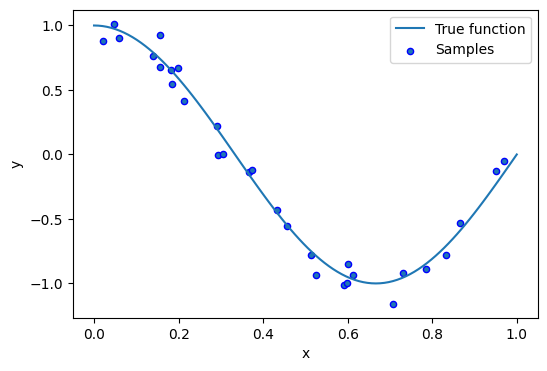

In [3]:
plt.figure(figsize=(6, 4))
plt.plot(np.linspace(0, 1, 100), true_fun(np.linspace(0, 1, 100)), label="True function")
plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best")
plt.show()

# Fit Models with Polynomial Features

We will fit models with polynomial features of degree 1, 4, and 15, and plot the results.

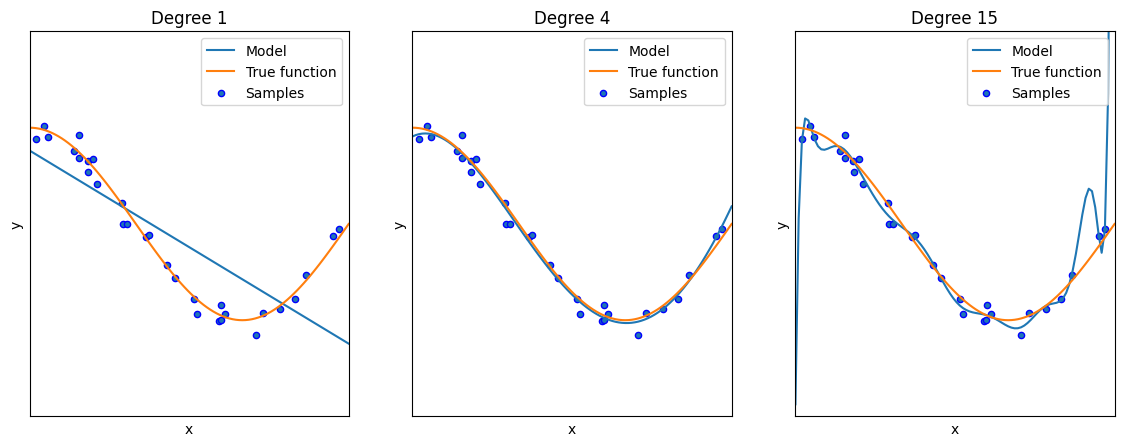

In [4]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}".format(degrees[i]))

plt.show()

# Evaluate Model Performance

We will evaluate the models using cross-validation and calculate the mean squared error (MSE) on the validation set.

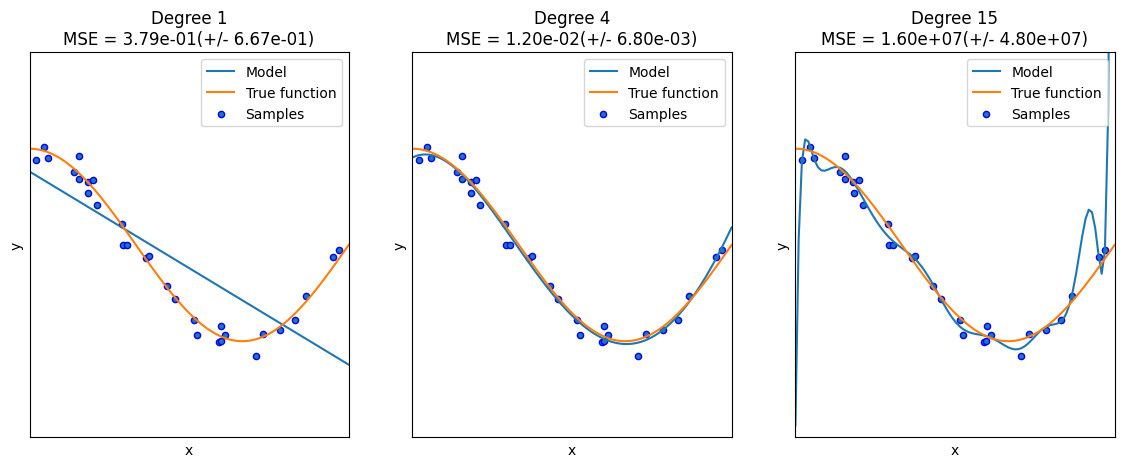

In [5]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )

plt.show()

# Summary

This lab demonstrated how to use linear regression with polynomial features to approximate nonlinear functions, and how to evaluate model performance using cross-validation. We saw that a linear function is not sufficient to fit the training samples, and that a polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees, the model will overfit the training data and learn the noise of the training data. We can use cross-validation and the mean squared error (MSE) to evaluate model performance and avoid overfitting.